<a href="https://colab.research.google.com/github/pranjalsinha1205/TitanicSurvivalPrediction/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [201]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [202]:
print(train.shape, test.shape)

(891, 12) (418, 12)


# Training dataset

In [203]:
(train.isnull().sum()/train.shape[0])*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
Survived        0.000000
dtype: float64

In [204]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


cabin might be related to fare, and in turn related to the class of the passenger so it might provide a new angle to the analysis. I will drop it for now but come back in future to look into it.

In [205]:
train = train.drop(['Cabin'], axis=1)
train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived'],
      dtype='object')

In [206]:
(train.isnull().sum()/train.shape[0])*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
Survived        0.000000
dtype: float64

In [207]:
train.Age = train.Age.fillna(train[train['Survived'] == 0]['Age'].median())
train.Age = train.Age.fillna(train[train['Survived'] == 1]['Age'].median())

In [208]:
train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

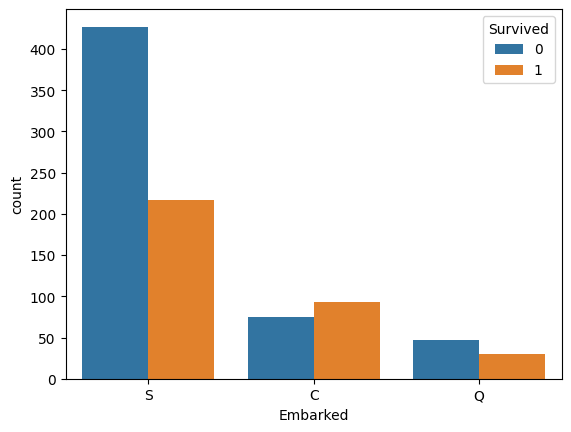

In [209]:
sns.countplot(x='Embarked', hue="Survived", data=train)

In [210]:
train.dropna(subset=['Embarked'], inplace=True)

# Testing dataset

In [211]:
(test.isnull().sum()/test.shape[0])*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
Survived        0.000000
dtype: float64

In [212]:
test = test.drop(['Cabin'], axis=1)
test.Age = test.Age.fillna(test[test['Survived'] == 0]['Age'].median())
test.Age = test.Age.fillna(test[test['Survived'] == 1]['Age'].median())
test.dropna(subset=['Fare'], inplace=True)

Data preprocessing done!

Now time for real action

In [213]:
train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived'],
      dtype='object')

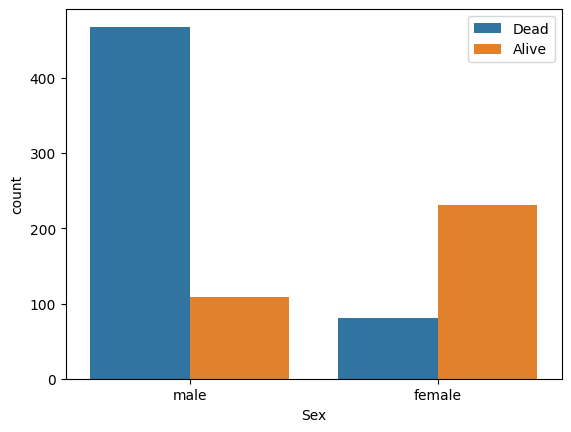

In [214]:
sns.countplot(x='Sex', hue='Survived', data=train)
plt.legend(labels=['Dead', 'Alive'])
plt.show()

This shows that the number of deaths amongst males was significantly higher than the number of deaths amongst the women, also on the other side far more women survived than men in the tragedy

In [215]:
train['Sex'] = (train.Sex == 'female').astype(int)

In [216]:
train.Sex.unique()

array([0, 1])

In [217]:
test['Sex'] = (test.Sex == 'female').astype(int)

In [218]:
test.Sex.unique()

array([0, 1])

<Axes: >

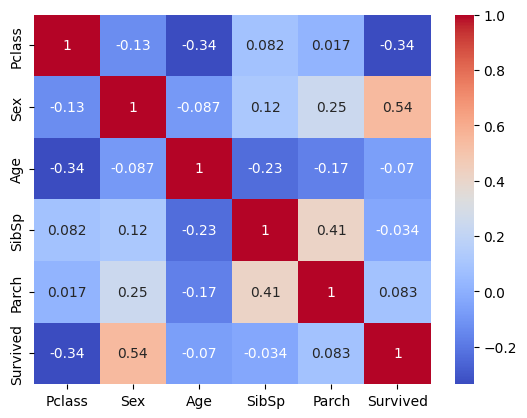

In [219]:
sns.heatmap(data=train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Survived']].corr(), cmap="coolwarm", annot=True)

Here we can see a moderate correlation between gender and chances of survivability. The other factors dont seem to have much correlation with the survivability of the victims

In [220]:
train.Pclass = train.Pclass.astype(str)
test.Pclass = test.Pclass.astype(str)

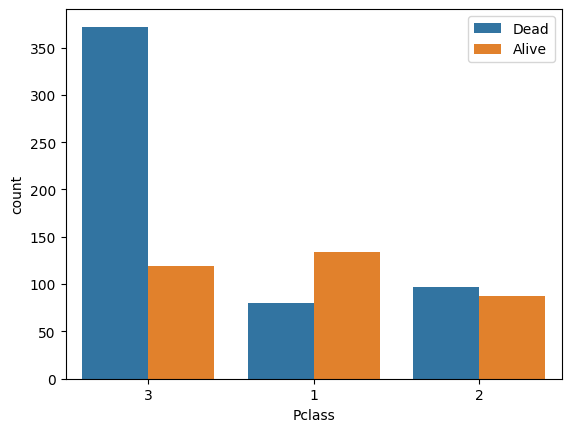

In [221]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.legend(labels=['Dead','Alive'])

From the graph it is made clear that the survivability also depended upon the class one was travlling in.

The chances of one not surviving in the 3rd class was significantly higher than any other class.

On the other hand, the rate of survivability was way higher in the first and second classes.

This might be because of the preferential treatment the rich enjoyed

In [222]:
train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived'],
      dtype='object')

In [223]:
# we can make two more columns to further decide the reasons for survivability
train['Family'] = train['SibSp'] + train['Parch']
train['HadFamily'] = (train['Family'] > 0).astype(int)
train['HadFamily'] = train.HadFamily.astype(str)

In [224]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Family,HadFamily
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0,1,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1,1,1
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,1,1,1
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0,0,0


[]

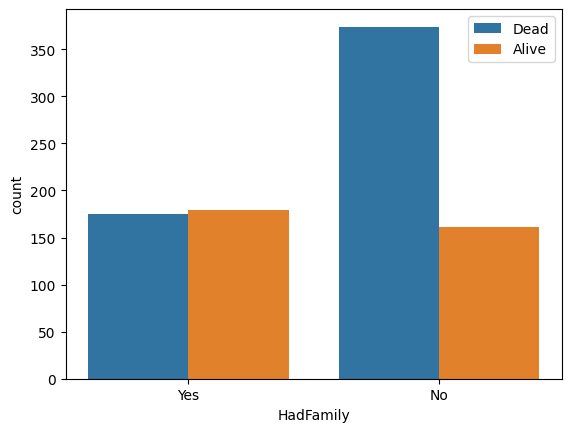

In [225]:
sns.countplot(x='HadFamily', hue='Survived', data=train)
plt.xticks(ticks=['0','1'], labels=['No', 'Yes'])
plt.legend(labels=['Dead', 'Alive'])
plt.plot()

One can say that most of the people who died were traveling without any family. This might be because of the preferential treatment families might have gotten or that the ones who didn't have any family must have decided to stay and help

In [226]:
df_nofamily_age = train[['HadFamily', 'Age', 'Survived']]
df_nofamily_age = df_nofamily_age[df_nofamily_age.HadFamily == '0']
df_nofamily_age.describe()

,Age,Survived
count,535.000000,535.000000
mean,31.104673,0.300935
std,11.271641,0.459094
min,5.000000,0.000000
25%,24.000000,0.000000
50%,28.000000,0.000000
75%,35.000000,1.000000
max,80.000000,1.000000


[]

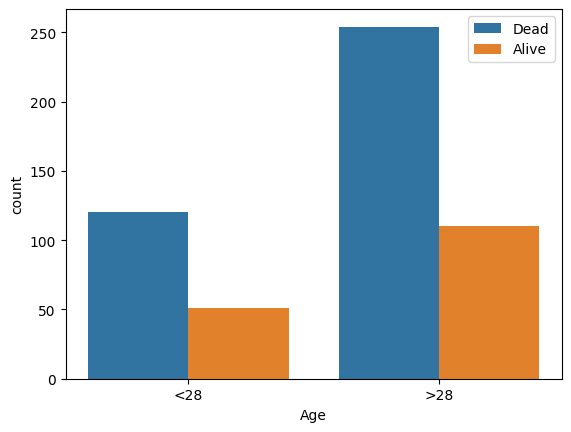

In [227]:
df_nofamily_age.Age = (df_nofamily_age['Age'] >= df_nofamily_age['Age'].median()).astype(int)
df_nofamily_age.Age = df_nofamily_age.Age.astype(str)
sns.countplot(x='Age', hue='Survived', data=df_nofamily_age)
plt.xticks(ticks=['0','1'], labels=['<28', '>28'])
plt.legend(labels=['Dead', 'Alive'])
plt.plot()

Not much can be drawn from this data, we have to now look for the death rates across children, adults, and elderly

In [231]:
df_age_survival = train[['Age', 'Survived']]
df_age_survival['Age_Category'] = df_age_survival['Age'].apply(lambda x: 'Child' if x < 14 else ('Adult' if x < 51 else 'Elderly'))
df_age_survival.head()

<ipython-input-231-0f9e5b868f52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_survival['Age_Category'] = df_age_survival['Age'].apply(lambda x: 'Child' if x < 14 else ('Adult' if x < 51 else 'Elderly'))


,Age,Survived,Age_Category
0,22.0,0,Adult
1,38.0,1,Adult
2,26.0,1,Adult
3,35.0,1,Adult
4,35.0,0,Adult


[]

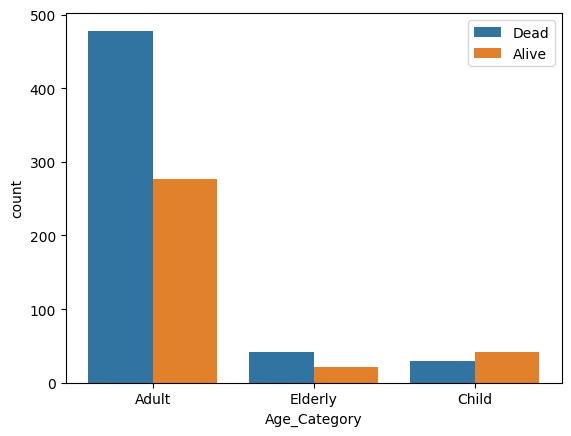

In [233]:
sns.countplot(x='Age_Category', hue='Survived', data=df_age_survival)
plt.legend(labels = ['Dead', 'Alive'])
plt.plot()

From this one could conclude that the children were given preferential treatment in the titanic, whereas the Adults and Elderly were almost treated equally

In [235]:
# We dont have much use of Family and HadFamily columns now so we will drop them
train = train.drop(['Family', 'HadFamily'], axis=1)
train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived'],
      dtype='object')

# Machine Learning

Now I will try testing out different models and compare the results witht the test dataset

In [236]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [248]:
train.Age = train.Age.astype(int)

In [262]:
#preparing the testing and training datasets
y_train = train.Survived
X_train = train.drop(['PassengerId','Embarked','Survived','Name','Ticket'], axis=1)
y_test = test.Survived
X_test = test.drop(['PassengerId','Embarked','Survived','Name','Ticket'], axis=1)
print(X_train.columns, X_test.columns)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object') Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [263]:
train.dtypes

PassengerId      int64
Pclass          object
Name            object
Sex              int64
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Survived         int64
dtype: object

In [271]:
knn_model = KNeighborsClassifier(n_neighbors=10)

In [272]:
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       265
           1       0.60      0.47      0.52       152

    accuracy                           0.69       417
   macro avg       0.66      0.64      0.65       417
weighted avg       0.68      0.69      0.68       417



The accuracy is not good at all!

Let's try out a different model

This time Naive Bayes

In [266]:
from sklearn.naive_bayes import GaussianNB

In [273]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [274]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       265
           1       0.86      0.96      0.91       152

    accuracy                           0.93       417
   macro avg       0.92      0.94      0.93       417
weighted avg       0.94      0.93      0.93       417



In this case we get a whopping 93% accuracy making this Naive Bayes model the best for further approach, but we will still continue further to look for better models.

Let's use decision tree and random forest

In [292]:
from sklearn.tree import DecisionTreeRegressor

In [293]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [294]:
y_pred = dt_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       265
           1       0.61      0.78      0.69       152

    accuracy                           0.74       417
   macro avg       0.73      0.75      0.73       417
weighted avg       0.76      0.74      0.75       417



Using decision tree we get an accuracy of 74% which is not too bad but not great either

In [302]:
from sklearn.ensemble import RandomForestRegressor

In [303]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [304]:
y_pred = rf_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       265
           1       0.77      0.78      0.78       152

    accuracy                           0.83       417
   macro avg       0.82      0.82      0.82       417
weighted avg       0.84      0.83      0.83       417



The random forest gives us an accuracy of 83% which is quite good

Now let's try logistic regression

In [305]:
from sklearn.linear_model import LogisticRegression

In [306]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [307]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       265
           1       0.89      0.94      0.91       152

    accuracy                           0.94       417
   macro avg       0.93      0.94      0.93       417
weighted avg       0.94      0.94      0.94       417



Logistic regression also has a high value just as Naive Bayes. It stands at 94% almost the same as the Naive Bayes model.

Now let's take a look at SVM

In [308]:
from sklearn.svm import SVC

In [309]:
svm_model = SVC()

In [310]:
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.87      0.76       265
           1       0.55      0.28      0.37       152

    accuracy                           0.65       417
   macro avg       0.62      0.57      0.57       417
weighted avg       0.63      0.65      0.62       417



SVM has a bad accuracy of 65%, it is not suitable for this model at all

# Now let's try prediction using neural networks

In [311]:
import tensorflow as tf

In [321]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [322]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
nn_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=.2)

In [326]:
y_pred = nn_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred))

14/14 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       265
           1       0.99      0.87      0.92       152

    accuracy                           0.95       417
   macro avg       0.96      0.93      0.94       417
weighted avg       0.95      0.95      0.95       417



# Which model to choose?

Neural Networks(95%): More complex models with high accuracy potential, but can be difficult to interpret and explain predictions.

Naive Bayes(93%): Easier to explain predictions due to its probabilistic nature. Techniques like LIME can further enhance interpretability.

Logistic Regression(94%): Not as easy to interpret as Naive Bayes, but you can analyze model coefficients to understand the influence of features on survival probability. This can be informative for data analysis, but explaining it to users might be less straightforward.